In [19]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from jcopml.tuning import grid_search_params as gsp

In [20]:
from luwiji.neural_network import illustration

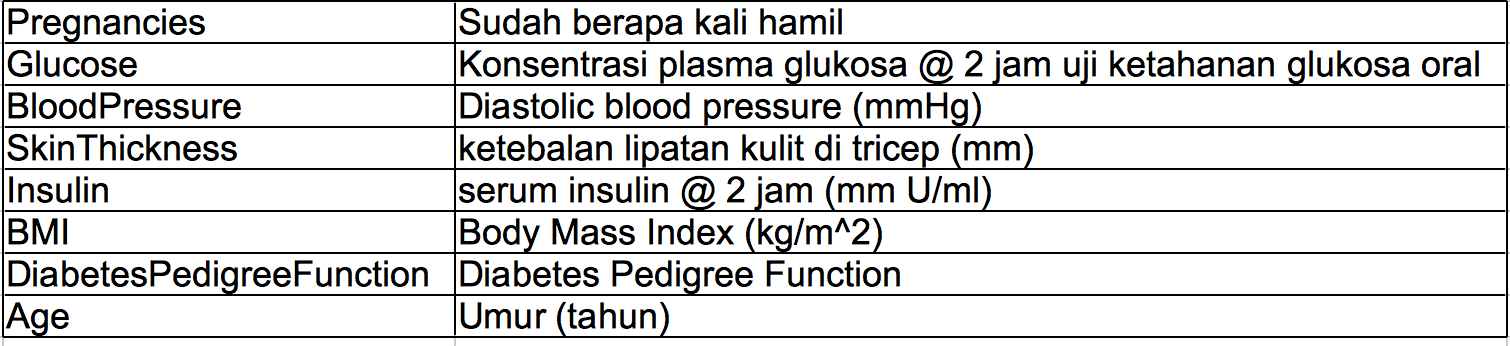

In [5]:
illustration.nomenklatur

# Import Data

modified from source: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [6]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


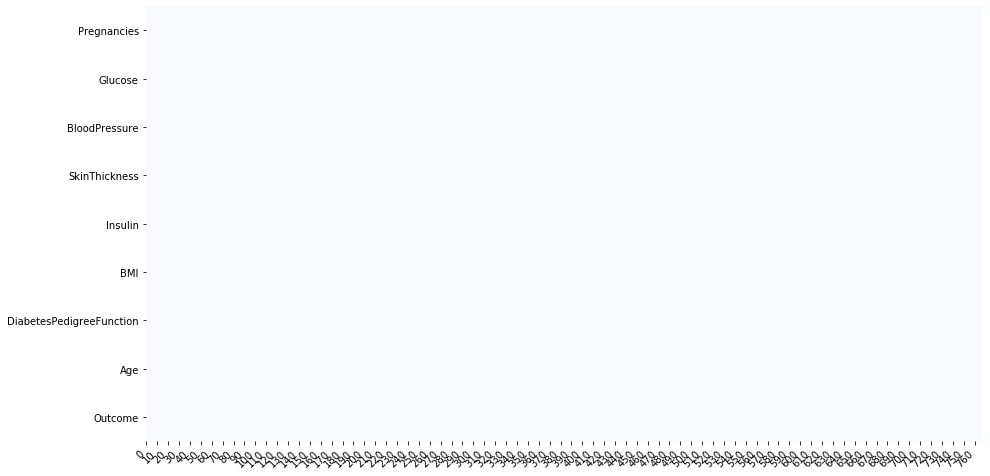

In [7]:
plot_missing_value(df)

In [8]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Dataset Splitting

In [9]:
X = df.drop(columns="Outcome")
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

# Training

In [11]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
                             "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('mlp', MLPClassifier(random_state=42))
])

parameter = {
    "mlp__alpha": [0.0001, 0.0003, 0.001, 0.003],
    "mlp__hidden_layer_sizes": [(16,), (32, 16), (32, 16, 8)],
    "mlp__learning_rate_init": [0.001, 0.005, 0.01],
    "mlp__activation": ["relu", "logistic", "tanh"]
}

model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   19.7s finished


{'mlp__activation': 'relu', 'mlp__alpha': 0.0003, 'mlp__hidden_layer_sizes': (32, 16, 8), 'mlp__learning_rate_init': 0.005}
0.744299674267101 0.723202614379085 0.7337662337662337


# Feature Importance

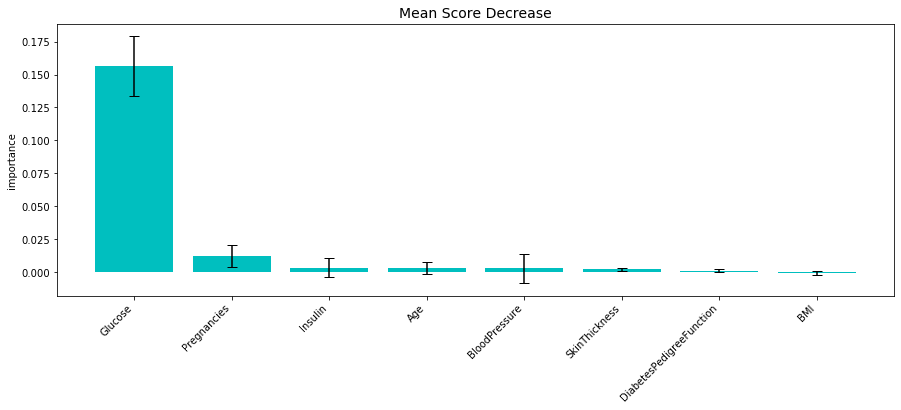

In [14]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True)

In [16]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, scaling='minmax'), ["Glucose", "BMI", "SkinThickness"])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('mlp', MLPClassifier(random_state=42))
])

parameter = {
    "mlp__alpha": [0.0001, 0.0003, 0.001, 0.003],
    "mlp__hidden_layer_sizes": [(16,), (32, 16), (32, 16, 8)],
    "mlp__learning_rate_init": [0.001, 0.005, 0.01],
    "mlp__activation": ["relu", "logistic", "tanh"]
}

model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.0s


{'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (32, 16, 8), 'mlp__learning_rate_init': 0.001}
0.7785016286644951 0.7817870237525906 0.7142857142857143


[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   19.3s finished
